# Train Auto Gluon

***In this notebook we train AutoGluon which will be used in `predict.py`***

In [1]:
!python -m pip install --upgrade pip
!python -m pip install autogluon

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 16.2 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: pip
    Found existing installation: pip 24.0
    Uninstalling pip-24.0:
      Successfully uninstalled pip-24.0
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of openxlab to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of openxlab to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort this run, press Ctrl + C.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 33.2 MB/s eta 0:00:

In [15]:
import shutil
import pandas as pd
from autogluon.tabular import TabularDataset, TabularPredictor

Define GLOBAL variables

In [10]:
DATA_DIR = "/kaggle/input/quantumassessmentdataset"

TRAIN_FILE_NAME = "train.csv"
TRAIN_FILE_PATH = f"{DATA_DIR}/{TRAIN_FILE_NAME}"

HIDDEN_TEST_FILE_NAME = "hidden_test.csv"
HIDDEN_TEST_FILE_PATH = f"{DATA_DIR}/{HIDDEN_TEST_FILE_NAME}"

OUTPUT_DIR = "/kaggle/working"
OUTPUT_FILE_NAME = "auto_gluon.csv"
OUTPUT_FILE_PATH = f"{OUTPUT_DIR}/{OUTPUT_FILE_NAME}"

DEFAULT_MODEL_FOLDER = "AutogluonModels" # DO NOT CHANGE THIS ONE if you run notebook in Kaggle
MODEL_OUTPUT_ZIP = f"{DEFAULT_MODEL_FOLDER}.zip"

TARGET_COLUMN = "target"

### Create train dataset object and train models using AutoGluon

In [4]:
train_data = TabularDataset(TRAIN_FILE_PATH)
train_data.head()

Loaded data from: /kaggle/input/quantumassessmentdataset/train.csv | Columns = 54 / 54 | Rows = 90000 -> 90000


,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,target
0,236,488,16,221,382,97,-4.472136,0.107472,0,132,...,13.340874,0.870542,1.962937,7.466666,11.547794,8.822916,9.046424,7.895535,11.010677,20.107472
1,386,206,357,232,1,198,7.810250,0.763713,1,143,...,12.484882,7.168680,2.885415,12.413973,10.260494,10.091351,9.270888,3.173994,13.921871,61.763713
2,429,49,481,111,111,146,8.602325,0.651162,1,430,...,14.030257,0.394970,8.160625,12.592059,8.937577,2.265191,11.255721,12.794841,12.080951,74.651162
3,414,350,481,370,208,158,8.306624,0.424645,1,340,...,2.789577,6.416708,10.549814,11.456437,6.468099,2.519049,0.258284,9.317696,5.383098,69.424645
4,318,359,20,218,317,301,8.124038,0.767304,1,212,...,1.886560,1.919999,2.268203,0.149421,4.105907,10.416291,6.816217,8.586960,4.512419,66.767304


In [6]:
predictor = TabularPredictor(label=TARGET_COLUMN).fit(
    train_data
)

No path specified. Models will be saved in: "AutogluonModels/ag-20241128_005941"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.10.14
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Sun Nov 10 10:07:59 UTC 2024
CPU Count:          4
Memory Avail:       29.99 GB / 31.35 GB (95.7%)
Disk Space Avail:   19.50 GB / 19.52 GB (99.9%)
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets. Defaulting to `'medium'`...
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='experimental' : New in v1.2: Pre-trained foundation model + parallel fits. The absolute best accuracy without consideration for inference speed. Does not support GPU.
	presets='best'         : Maximize accuracy. Recommended for most users. Use in competitions a

[1000]	valid_set's rmse: 0.900245
[2000]	valid_set's rmse: 0.749061
[3000]	valid_set's rmse: 0.672391
[4000]	valid_set's rmse: 0.628793
[5000]	valid_set's rmse: 0.598689
[6000]	valid_set's rmse: 0.578843
[7000]	valid_set's rmse: 0.561797
[8000]	valid_set's rmse: 0.549142
[9000]	valid_set's rmse: 0.53924
[10000]	valid_set's rmse: 0.530383


	-0.5304	 = Validation score   (-root_mean_squared_error)
	105.8s	 = Training   runtime
	1.53s	 = Validation runtime
Fitting model: LightGBM ...


[1000]	valid_set's rmse: 0.00811239
[2000]	valid_set's rmse: 0.00717776
[3000]	valid_set's rmse: 0.00677294
[4000]	valid_set's rmse: 0.00660738
[5000]	valid_set's rmse: 0.0064275
[6000]	valid_set's rmse: 0.00633882
[7000]	valid_set's rmse: 0.00629134
[8000]	valid_set's rmse: 0.0062692
[9000]	valid_set's rmse: 0.00626332
[10000]	valid_set's rmse: 0.00625688


	-0.0063	 = Validation score   (-root_mean_squared_error)
	96.13s	 = Training   runtime
	1.23s	 = Validation runtime
Fitting model: RandomForestMSE ...
	-0.003	 = Validation score   (-root_mean_squared_error)
	699.22s	 = Training   runtime
	0.17s	 = Validation runtime
Fitting model: CatBoost ...
	-0.0014	 = Validation score   (-root_mean_squared_error)
	316.03s	 = Training   runtime
	0.03s	 = Validation runtime
Fitting model: ExtraTreesMSE ...
	-0.0046	 = Validation score   (-root_mean_squared_error)
	132.6s	 = Training   runtime
	0.17s	 = Validation runtime
Fitting model: NeuralNetFastAI ...
	-0.4475	 = Validation score   (-root_mean_squared_error)
	99.7s	 = Training   runtime
	0.05s	 = Validation runtime
Fitting model: XGBoost ...
	-0.011	 = Validation score   (-root_mean_squared_error)
	105.29s	 = Training   runtime
	0.79s	 = Validation runtime
Fitting model: NeuralNetTorch ...
	-3.6331	 = Validation score   (-root_mean_squared_error)
	84.98s	 = Training   runtime
	0.01s	 = Validati

[1000]	valid_set's rmse: 0.19586
[2000]	valid_set's rmse: 0.191989
[3000]	valid_set's rmse: 0.190585
[4000]	valid_set's rmse: 0.190128
[5000]	valid_set's rmse: 0.189706
[6000]	valid_set's rmse: 0.189582
[7000]	valid_set's rmse: 0.189589
[8000]	valid_set's rmse: 0.18954
[9000]	valid_set's rmse: 0.189506
[10000]	valid_set's rmse: 0.189487


	-0.1895	 = Validation score   (-root_mean_squared_error)
	225.84s	 = Training   runtime
	2.93s	 = Validation runtime
Fitting model: WeightedEnsemble_L2 ...
	Ensemble Weights: {'CatBoost': 0.737, 'RandomForestMSE': 0.158, 'LightGBM': 0.053, 'ExtraTreesMSE': 0.053}
	-0.0012	 = Validation score   (-root_mean_squared_error)
	0.02s	 = Training   runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 1887.62s ... Best model: WeightedEnsemble_L2 | Estimated inference throughput: 1565.2 rows/s (2500 batch size)
TabularPredictor saved. To load, use: predictor = TabularPredictor.load("/kaggle/working/AutogluonModels/ag-20241128_005941")


***Why some RMSE scores are negative?***

In general it is expected behaviour as AutoGluon expects higher values to be better, so they just flip metrics that do not fit into this framework.

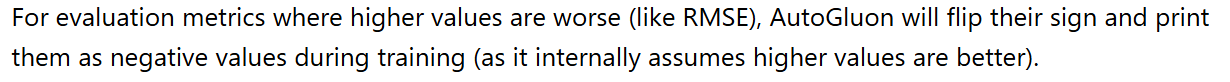


[Link to official documentation](https://auto.gluon.ai/0.8.1/tutorials/tabular/tabular-essentials.html)

### Create test data object and calculate output for hidden test.

In [7]:
test_data = TabularDataset(HIDDEN_TEST_FILE_PATH)

Loaded data from: /kaggle/input/quantumassessmentdataset/hidden_test.csv | Columns = 53 / 53 | Rows = 10000 -> 10000


In [8]:
y_pred = predictor.predict(test_data)
y_pred.head()

0    11.219907
1    79.699860
2     7.495621
3    38.511837
4    64.757797
Name: target, dtype: float32

In [12]:
df = pd.DataFrame({TARGET_COLUMN: y_pred})

In [13]:
df.to_csv(OUTPUT_FILE_PATH, index=False)

In [16]:
# Create the zip file
shutil.make_archive(MODEL_OUTPUT_ZIP.replace('.zip', ''), 'zip', DEFAULT_MODEL_FOLDER)

'/kaggle/working/AutogluonModels.zip'